In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
def generate(n=1000, stay=True):
    results = []
    for i in range(n):
        prizes = np.random.randint(0, 3)
        prizes = np.eye(3)[prizes]
        first_choice = np.random.randint(0, 3)
        if prizes[first_choice] == 1:
            mod_choices = np.setdiff1d([0, 1, 2], first_choice, assume_unique=True)
        else:
            mod_choices = np.setdiff1d([0, 1, 2], [first_choice, np.where(prizes==1)[0].item()])
        mod_choice = np.random.choice(mod_choices)
        if stay:
            final_choice = first_choice
        else:
            final_choice = np.setdiff1d([0, 1, 2], [first_choice, mod_choice])
        
        results.append(prizes[final_choice].item())
    return results

In [8]:
n = 5000
stay = generate(n, True)
change = generate(n, False)

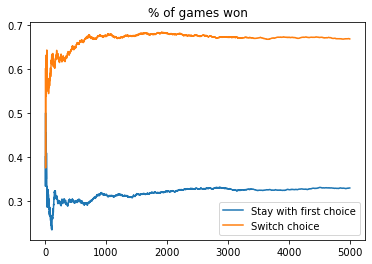

In [9]:
stay_pct = np.cumsum(stay)/np.arange(n)
change_pct = np.cumsum(change)/np.arange(n)

burn_in = 5
sns.lineplot(y=stay_pct[burn_in:], x=np.arange(burn_in, n), label="Stay with first choice")
sns.lineplot(y=change_pct[burn_in:], x=np.arange(burn_in, n), label="Switch choice")
plt.title("% of games won");